<a href="https://colab.research.google.com/github/Navi433/CIFAR-CNN/blob/master/CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [50]:
import tensorflow
print(tensorflow.__version__)

2.0.0-rc0


In [51]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
%tensorflow_version 2.x

In [53]:
import tensorflow
print(tensorflow.__version__)

2.0.0-rc0


In [54]:
!pip install mlxtend==0.17.0

In [0]:
#import keras

In [0]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [0]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [80]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [81]:
(X_train.shape,y_train.shape),(X_test.shape,y_train.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (50000, 1)))

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0


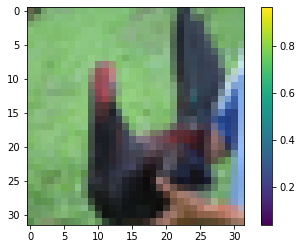

In [83]:
plt.figure()
plt.imshow(X_test[25])
plt.colorbar()

In [84]:
y_test[25]

array([2], dtype=uint8)

In [85]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Model Building

In [0]:
#model=tensorflow.keras.Sequential()

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(32,32,3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [96]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 157s 3ms/sample - loss: 1.4656 - accuracy: 0.4728 - val_loss: 1.3625 - val_accuracy: 0.5450
Epoch 2/10
45000/45000 [==============================] - 154s 3ms/sample - loss: 1.1373 - accuracy: 0.5950 - val_loss: 1.0441 - val_accuracy: 0.6320
Epoch 3/10
45000/45000 [==============================] - 155s 3ms/sample - loss: 0.9963 - accuracy: 0.6467 - val_loss: 0.9555 - val_accuracy: 0.6630
Epoch 4/10
45000/45000 [==============================] - 154s 3ms/sample - loss: 0.9105 - accuracy: 0.6787 - val_loss: 0.9155 - val_accuracy: 0.6872
Epoch 5/10
45000/45000 [==============================] - 153s 3ms/sample - loss: 0.8403 - accuracy: 0.6998 - val_loss: 0.8785 - val_accuracy: 0.6944
Epoch 6/10
45000/45000 [==============================] - 153s 3ms/sample - loss: 0.7757 - accuracy: 0.7254 - val_loss: 0.8669 - val_accuracy: 0.6948
Epoch 7/10
45000/45000 [===========================

In [0]:
 from keras.preprocessing import image

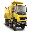

In [203]:
img=image.load_img('/content/download.jpg',color_mode='rgb',target_size=(32,32))
img

In [0]:
img=image.img_to_array(img)

In [0]:
img=img/255.0

In [0]:
img= np.expand_dims(img, axis = 0)

In [0]:
result=model.predict(img)

In [208]:
result

array([[6.0842667e-06, 1.6202237e-02, 3.4616014e-09, 1.8886639e-07,
        5.0326847e-08, 3.8351508e-10, 2.1875063e-07, 4.1840063e-11,
        1.8928094e-07, 9.8379105e-01]], dtype=float32)

In [209]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
y_pred=model.predict_classes(X_test)

In [172]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [173]:
y_pred

array([3, 1, 8, ..., 2, 4, 7])

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [0]:
cf=confusion_matrix(y_test,y_pred)

In [176]:
accuracy_score(y_test,y_pred)

0.6869

In [0]:

from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f328d86c780>)

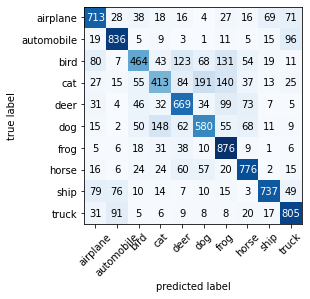

In [182]:
 plot_confusion_matrix(cf,class_names=class_names)

In [0]:
yhat=model.predict(X_test)

In [211]:
yhat[11]

array([6.5528902e-06, 3.2589890e-04, 5.0548561e-08, 3.3079290e-09,
       1.6701630e-09, 1.3036294e-10, 9.5618287e-09, 3.6483681e-09,
       3.5086232e-06, 9.9966407e-01], dtype=float32)

In [199]:
y_test[11]

array([9], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt

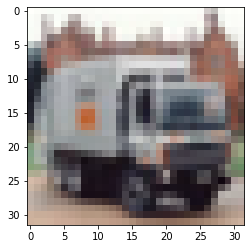

In [198]:
plt.imshow(X_test[11])

In [193]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']